In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### TopUniversities.com (QS)


In [2]:
# input: link to the university details page where we can find the detail numbers
# returns an array as follows: [total_academic_fac_staff, inter_academic_fac_staff, total_students, inter_students]
def get_details(link):
    link = link + '#wurs'
    r = requests.get(link)
    page_body = r.text

    soup = BeautifulSoup(page_body, 'html.parser')
    
    # will contain total_academic_fac_staff, inter_academic_fac_staff, total_students, inter_students
    results = []
    for name in ['total faculty', 'inter faculty', 'total student', 'total inter']:
        try:
            elem = np.float(soup.find('div', class_= name).find('div', class_='number').text.replace(',',''))
        except AttributeError:
            elem = None
        results.append(elem)
    return results

In [29]:
# send a request to get the content of the ranking list
# We found the correct url where to send the request using postman and checking the different requests that were sent
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt')
page_body = r.text
json_data = r.json()
cols = ['QSrank', 'region', 'country', 'Faculty members (total)', 'Faculty members (inter.)', 'Students (total)', 'Students (inter.)']
df_QS = pd.DataFrame(columns=cols)


# for each univerity in the list, get basic attributes and try to get the details
# We had to discard one university with the above ranking check. Thus we also take the 201th university to have the actual top-200
for i, uni in enumerate(json_data['data'][:201]):
    soup = BeautifulSoup(uni['uni'], 'html.parser')
    details_link = 'https://www.topuniversities.com' + soup.a['href']
    name = soup.a.string
    country = uni['location']
    region = uni['region']
    rank = np.float(uni['overall_rank'])
    details = get_details(details_link)
    # we saw that for some reason the uni ranked 281 appeared in the top-200.
    # this check avoids having it in our ranking
    if int(rank) <= 201:
        df_QS.loc[name] = ([rank, region, country] + details)
    print("Progression: " + '{0:.1f}'.format(100*(i+1)/200.0) + "%", end="\r")
#print("Progression: Done!", end="\r")

In [30]:
#df[pd.isnull(df['Faculty members (inter.)'])]
df_QS.head(5)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.)
Massachusetts Institute of Technology (MIT),1.0,North America,United States,2982.0,1679,11067.0,3717.0
Stanford University,2.0,North America,United States,4285.0,2042,15878.0,3611.0
Harvard University,3.0,North America,United States,4350.0,1311,22429.0,5266.0
California Institute of Technology (Caltech),4.0,North America,United States,953.0,350,2255.0,647.0
University of Cambridge,5.0,Europe,United Kingdom,5490.0,2278,18770.0,6699.0


In [31]:
#Top 10 universities with the largest fac members/students ratio
df_QS['Fac members/Students ratio'] = df_QS['Faculty members (total)']/df_QS['Students (total)']
resultfirstratio = df_QS.sort_values('Fac members/Students ratio' , ascending = False )
resultfirstratio.head(10)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Fac members/Students ratio
California Institute of Technology (Caltech),4.0,North America,United States,953.0,350,2255.0,647.0,0.422616
Yale University,16.0,North America,United States,4940.0,1708,12402.0,2469.0,0.398323
University of Oxford,6.0,Europe,United Kingdom,6750.0,2964,19720.0,7353.0,0.342292
University of Cambridge,5.0,Europe,United Kingdom,5490.0,2278,18770.0,6699.0,0.292488
Johns Hopkins University,17.0,North America,United States,4462.0,1061,16146.0,4105.0,0.276353
Stanford University,2.0,North America,United States,4285.0,2042,15878.0,3611.0,0.269870
Massachusetts Institute of Technology (MIT),1.0,North America,United States,2982.0,1679,11067.0,3717.0,0.269450
University of Rochester,186.0,North America,United States,2569.0,488,9636.0,2805.0,0.266604
University of Pennsylvania,19.0,North America,United States,5499.0,1383,20639.0,4250.0,0.266437
Columbia University,18.0,North America,United States,6189.0,913,25045.0,8105.0,0.247115


In [32]:
#Top 10 universities with the largest international students ratio
df_QS['International students ratio'] = df_QS['Students (inter.)']/df_QS['Students (total)']
resultsecondratio = df_QS.sort_values('International students ratio' , ascending = False )
resultsecondratio.head(10)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Fac members/Students ratio,International students ratio
London School of Economics and Political Science (LSE),35.0,Europe,United Kingdom,1088.0,687,9760.0,6748.0,0.111475,0.691393
Ecole Polytechnique Fédérale de Lausanne (EPFL),12.0,Europe,Switzerland,1695.0,1300,10343.0,5896.0,0.163879,0.570047
Imperial College London,8.0,Europe,United Kingdom,3930.0,2071,16090.0,8746.0,0.244251,0.543567
Maastricht University,200.0,Europe,Netherlands,1277.0,502,16385.0,8234.0,0.077937,0.502533
Carnegie Mellon University,47.0,North America,United States,1342.0,425,13356.0,6385.0,0.100479,0.478062
UCL (University College London),7.0,Europe,United Kingdom,6345.0,2554,31080.0,14854.0,0.204151,0.477928
University of St Andrews,92.0,Europe,United Kingdom,1140.0,485,8800.0,4030.0,0.129545,0.457955
The University of Melbourne,41.0,Oceania,Australia,3311.0,1477,42182.0,18030.0,0.078493,0.427434
Queen Mary University of London,127.0,Europe,United Kingdom,1885.0,801,16135.0,6806.0,0.116827,0.421816
The University of Hong Kong,26.0,Asia,Hong Kong,3012.0,2085,20214.0,8230.0,0.149006,0.407144


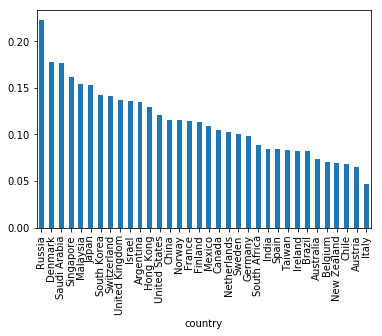

In [33]:
#Compute the ratio between faculty members and students per country
Country_facmembers = df_QS.groupby('country')['Faculty members (total)'].sum()
Country_students = df_QS.groupby('country')['Students (total)'].sum()
Country_facmembers.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')

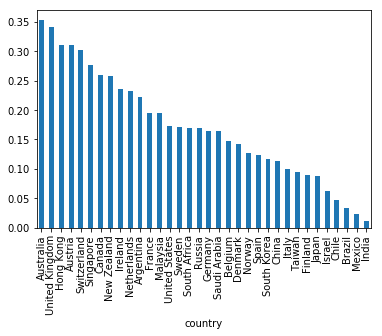

In [34]:
#Compute the ratio of international students per country
Country_intstudents = df_QS.groupby('country')['Students (inter.)'].sum()
Country_intstudents.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')

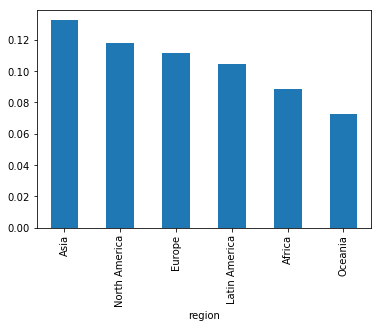

In [35]:
#Compute the ratio between faculty members and students per region
Region_facmembers = df_QS.groupby('region')['Faculty members (total)'].sum()
Region_students = df_QS.groupby('region')['Students (total)'].sum()
Region_facmembers.div(Region_students).sort_values(ascending=False).plot(kind = 'bar')

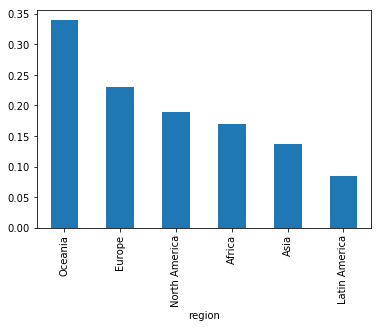

In [36]:
#Compute the ratio of international students per region
Region_intstudents = df_QS.groupby('region')['Students (inter.)'].sum()
Region_intstudents.div(Region_students).sort_values(ascending=False).plot(kind = 'bar')

### Times Higher education (TH)


In [37]:
# Make the request
r = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
page_body = r.text
page_body[:800]

soup = BeautifulSoup(page_body, 'html.parser')

In [38]:
json_data = r.json()

In [39]:
cols = ['THrank',  'country', 'Students (total)', 'Students (inter.)','International students ratio', 'Fac members/Students ratio','Faculty members (total)',]
df_TH = pd.DataFrame(columns=cols)


# for each univerity in the list, get basic attributes and try to get the details
for i, uni in enumerate(json_data['data'][:200]):
    name = uni['name']
    country = uni['location']
    THrank = uni['rank'] 
    students_tot = np.float16(uni['stats_number_students'].replace(',',''))
    student_int_ratio = np.float16(uni['stats_pc_intl_students'][:-1])/100
    student_staff_ratio = np.float(uni['stats_student_staff_ratio'])
    staff_number = np.float16(students_tot/student_staff_ratio)
    int_student = np.float16(students_tot*student_int_ratio)
    
    df_TH.loc[name] = ([THrank, country, students_tot, int_student, student_int_ratio, student_staff_ratio,staff_number])
    print("Progression: " + '{0:.1f}'.format(100*(i+1)/200.0) + "%", end="\r")

In [40]:
#Top 10 universities with the largest fac members/students ratio
resultfirstratio = df_TH.sort_values('Fac members/Students ratio' , ascending = False )
resultfirstratio.head(10)

,THrank,country,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
University of Bonn,=100,Germany,35616.0,4632.0,0.13,77.9,457.25
University of Mannheim,125,Germany,10992.0,1759.0,0.16,74.5,147.50
Technical University of Berlin,92,Germany,22384.0,4476.0,0.20,64.3,348.00
University of Erlangen-Nuremberg,=162,Germany,38720.0,4648.0,0.12,58.5,662.00
RWTH Aachen University,79,Germany,43712.0,7868.0,0.18,57.7,757.50
Free University of Berlin,88,Germany,34112.0,7164.0,0.21,57.0,598.50
Humboldt University of Berlin,62,Germany,32176.0,5468.0,0.17,56.5,569.50
Technical University of Munich,41,Germany,38688.0,8896.0,0.23,54.4,711.00
University of Cologne,145,Germany,45088.0,4508.0,0.10,50.9,886.00
Université Libre de Bruxelles,=175,Belgium,25344.0,8872.0,0.35,43.4,584.00


In [41]:
#Top 10 universities with the largest international students ratio
df_TH['International students ratio'] = df_TH['Students (inter.)']/df_TH['Students (total)']
resultsecondratio = df_TH.sort_values('International students ratio' , ascending = False )
resultsecondratio.head(10)

,THrank,country,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
London School of Economics and Political Science,=25,United Kingdom,10064.0,7144.0,0.709857,12.2,825.00
University of Luxembourg,=179,Luxembourg,4968.0,2832.0,0.570048,14.6,340.25
École Polytechnique Fédérale de Lausanne,=38,Switzerland,9928.0,5460.0,0.549960,11.2,886.50
Imperial College London,8,United Kingdom,15856.0,8720.0,0.549950,11.4,1391.00
Maastricht University,103,Netherlands,16720.0,8360.0,0.500000,18.0,929.00
University College London,16,United Kingdom,30304.0,14848.0,0.489968,10.5,2886.00
University of St Andrews,=143,United Kingdom,9008.0,4324.0,0.480018,13.0,693.00
Carnegie Mellon University,24,United States,12672.0,5704.0,0.450126,13.5,938.50
Queen Mary University of London,121,United Kingdom,15408.0,6932.0,0.449896,13.3,1158.00
University of Hong Kong,40,Hong Kong,18368.0,7716.0,0.420078,18.0,1020.50


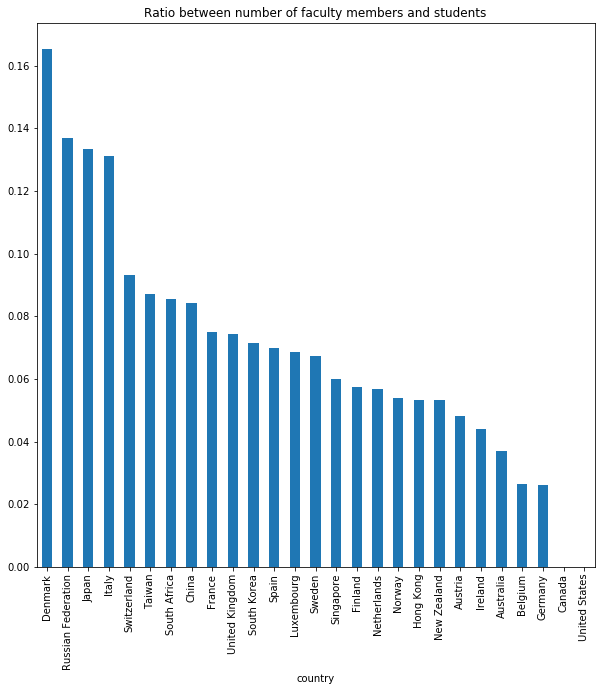

In [42]:
#Compute the ratio between faculty members and students per country
Country_facmembers = df_TH.groupby('country')['Faculty members (total)'].sum()
Country_students = df_TH.groupby('country')['Students (total)'].sum()
plt.figure(figsize=[10,10])
Country_facmembers.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and students')

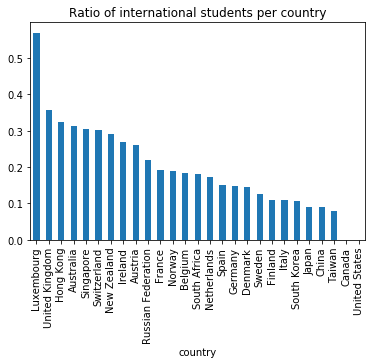

In [43]:
#Compute the ratio of international students per country
Country_intstudents = df_TH.groupby('country')['Students (inter.)'].sum()
Country_intstudents.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio of international students per country')

### Merging the two datasets


In [44]:
a = df_QS.index.values.tolist()
b = df_TH.index.values.tolist()
ab = set(a).intersection(b)

In [45]:
df_merged = df_QS.merge(df_TH,how='outer')

In [46]:
df_merged

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Fac members/Students ratio,International students ratio,THrank
0,1.0,North America,United States,2982.0000,1679,11067.0,3717.0000,0.269450,0.335863,NaN
1,2.0,North America,United States,4285.0000,2042,15878.0,3611.0000,0.269870,0.227422,NaN
2,3.0,North America,United States,4350.0000,1311,22429.0,5266.0000,0.193945,0.234785,NaN
3,4.0,North America,United States,953.0000,350,2255.0,647.0000,0.422616,0.286918,NaN
4,5.0,Europe,United Kingdom,5490.0000,2278,18770.0,6699.0000,0.292488,0.356899,NaN
5,6.0,Europe,United Kingdom,6750.0000,2964,19720.0,7353.0000,0.342292,0.372870,NaN
6,7.0,Europe,United Kingdom,6345.0000,2554,31080.0,14854.0000,0.204151,0.477928,NaN
7,8.0,Europe,United Kingdom,3930.0000,2071,16090.0,8746.0000,0.244251,0.543567,NaN
8,9.0,North America,United States,2449.0000,635,13557.0,3379.0000,0.180645,0.249244,NaN
9,10.0,Europe,Switzerland,2477.0000,1886,19815.0,7563.0000,0.125006,0.381681,NaN


In [47]:
df_TH.dtypes

THrank                           object
country                          object
Students (total)                float64
Students (inter.)               float64
International students ratio    float64
Fac members/Students ratio      float64
Faculty members (total)         float64
dtype: object

In [48]:
df_TH.describe()

,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
count,2.000000e+02,200.000000,198.000000,200.000000,200.000000
mean,inf,inf,0.219244,17.793000,inf
std,NaN,NaN,0.116088,12.347931,NaN
min,5.150000e+02,36.062500,0.030002,3.300000,58.968750
25%,1.487800e+04,2789.500000,0.129978,11.175000,869.375000
50%,2.312800e+04,4438.000000,0.194999,14.550000,1425.000000
75%,3.293600e+04,6695.000000,0.280070,19.800000,2318.500000
max,inf,inf,0.709857,77.900000,inf


In [49]:
df_TH.corr()

,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
Students (total),1.000000,0.555706,-0.289645,0.275881,0.541299
Students (inter.),0.555706,1.000000,0.518768,0.142464,0.246370
International students ratio,-0.289645,0.518768,1.000000,-0.121333,-0.210679
Fac members/Students ratio,0.275881,0.142464,-0.121333,1.000000,-0.438958
Faculty members (total),0.541299,0.246370,-0.210679,-0.438958,1.000000


In [50]:
df_TH

,THrank,country,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
University of Oxford,1,United Kingdom,2.041600e+04,7.760000e+03,0.380094,11.2,1823.000000
University of Cambridge,2,United Kingdom,1.838400e+04,6.436000e+03,0.350087,10.9,1687.000000
California Institute of Technology,=3,United States,2.208000e+03,5.960000e+02,0.269928,6.5,339.750000
Stanford University,=3,United States,1.584800e+04,3.486000e+03,0.219965,7.5,2114.000000
Massachusetts Institute of Technology,5,United States,1.117600e+04,3.800000e+03,0.340014,8.7,1285.000000
Harvard University,6,United States,2.032000e+04,5.284000e+03,0.260039,8.9,2284.000000
Princeton University,7,United States,7.956000e+03,1.909000e+03,0.239945,8.3,958.500000
Imperial College London,8,United Kingdom,1.585600e+04,8.720000e+03,0.549950,11.4,1391.000000
University of Chicago,9,United States,1.352800e+04,3.382000e+03,0.250000,6.2,2182.000000
ETH Zurich – Swiss Federal Institute of Technology Zurich,=10,Switzerland,1.923200e+04,7.308000e+03,0.379992,14.6,1317.000000


## String matching algorithm

In [51]:
def match_strings(s1, s2):
    return s1 == s2

In [87]:
import difflib
#df_match = pd.DataFrame()
#df_match['TH'] = df_TH.index
#df_match['QS'] = pd.Series(df_QS.index)

#df_match['TH_keywords'] = 
#df_math['QD_keywords']

#df_match.tail()

#df_match['base comparison'] = 



df1 = pd.DataFrame()
df1['QS'] = df_QS.index
df1.index = df_QS.index

df2 = pd.DataFrame()
df2['TS'] = df_TH.index
df2.index = df_TH.index
df2.head()
df2.shape


#df2.index = df2.index.map(lambda x: difflib.get_close_matches(x,df1.index)[0])
#df2.head()

(200, 1)

In [88]:
df2.head()

,TS
University of Oxford,University of Oxford
University of Cambridge,University of Cambridge
California Institute of Technology,California Institute of Technology
Stanford University,Stanford University
Massachusetts Institute of Technology,Massachusetts Institute of Technology


In [89]:
#df_QS.shape
def match_map(x, df1):
    li = difflib.get_close_matches(x, df1.index)
    if len(li) == 0:
        return None
    else:
        return li[0]
df2.index = df2.index.map(lambda x: match_map(x, df1))
df2.head(2)

,TS
University of Oxford,University of Oxford
University of Cambridge,University of Cambridge


In [75]:
 pd.set_option('display.max_rows', 200)
df2

,TS
University of Oxford,University of Oxford
University of Cambridge,University of Cambridge
California Institute of Technology (Caltech),California Institute of Technology
Stanford University,Stanford University
Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology
Harvard University,Harvard University
Princeton University,Princeton University
Imperial College London,Imperial College London
University of Chicago,University of Chicago
ETH Zurich - Swiss Federal Institute of Technology,ETH Zurich – Swiss Federal Institute of Techno...


In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
df1.shape
df1.head(2)

In [520]:
import string
import re
from difflib import SequenceMatcher as SM

# returns a version of the string cleaned of all the words/characters tha
# do not give any information about the uni and can make it differ from its matching
def clean_string(elem, pattern):
    # replace - by space
    clean_elem = re.sub('[–-]', ' ', elem)
    # remove all that is inside parenthesis (if it's at least 5 characters)
    clean_elem = re.sub(r'\(.{0,5}?\)', '', clean_elem)
    # to lowercase
    clean_elem = clean_elem.lower()
    # remove accents
    clean_elem = re.sub('[\é\è]', 'e', clean_elem)
    clean_elem = re.sub('[ä]', 'a', clean_elem)
    clean_elem = re.sub('[ü]', 'u', clean_elem)
    clean_elem = re.sub('[ö]', 'o', clean_elem)
    # remove all punctuation
    clean_elem = "".join([c for c in clean_elem if c in string.ascii_letters or c in string.whitespace])
    # remove all linking words that are not useful to disinguish universities and can cause issues
    words = [x for x in clean_elem.split() if re.match(pattern, x) is None]
    clean_elem = ' '.join(words)
    # if a space remains at the end of the string, remove it. Also remove double spaces
    clean_elem = re.sub('[ ]{2,}', ' ', clean_elem)
    if clean_elem[-1] == ' ':
        clean_elem = clean_elem[:-1]
    return clean_elem

In [521]:
# creating the two lists and a dictionary for the matchings
a = df_QS.index.values.tolist()
b = df_TH.index.values.tolist()
matchings = dict()
for elem in a:
    matchings[elem] = None

# The words that we want to get rid of when we clean the name
pattern = r'[uU]niversit(y|at|aet)|(\bof\b)|\b([tT]he)\b|(\bzu\b)|(\bat\b)'

# first match and extract all perfect matchings and names that match after cleaning them
for elemA in a:
    for elemB in b.copy():
        if elemA == elemB or clean_string(elemA, pattern) == clean_string(elemB, pattern):
            matchings[elemA] = elemB
            b.remove(elemB)
print(str(200 - len(b)) + ' elements out of 200 are matched')

141 elements out of 200 were matched


In [522]:
# fuzzy matching
# TODO document this section
threshold = 0.67
for elemB in b.copy():
    max_ratio = 0
    best_match = None
    for elemA in a:
        match_ratio = SM(None, clean_string(elemA, pattern), clean_string(elemB, pattern)).ratio()
        if match_ratio > threshold and match_ratio > max_ratio and matchings[elemA] is None:
            max_ratio = match_ratio
            best_match = elemA
    if best_match is not None:
        matchings[best_match] = elemB
        b.remove(elemB)
        print(best_match + " -> " + elemB + " " + str(int(max_ratio*100)))

print(str(200 - len(b)) + ' elements out of 200 are matched')
        

California Institute of Technology (Caltech) -> California Institute of Technology 88
ETH Zurich - Swiss Federal Institute of Technology -> ETH Zurich – Swiss Federal Institute of Technology Zurich 92
UCL (University College London) -> University College London 87
Wageningen University -> Wageningen University & Research 68
The University of New South Wales (UNSW Sydney) -> University of New South Wales 71
Freie Universitaet Berlin -> Free University of Berlin 95
KAIST - Korea Advanced Institute of Science & Technology -> Korea Advanced Institute of Science and Technology (KAIST) 89
Trinity College Dublin, The University of Dublin -> Trinity College Dublin 86
Université Pierre et Marie Curie (UPMC) -> Pierre and Marie Curie University 70
KIT, Karlsruhe Institute of Technology -> Karlsruhe Institute of Technology 93
Pohang University of Science And Technology (POSTECH) -> Pohang University of Science and Technology 87
Universitat Autònoma de Barcelona -> Autonomous University of Barcelo

In [325]:
# remaining universities
for elemB in b:
    matchings[elemB] = None

In [526]:
'''for key in matchings:
    if(key != matchings[key]) and matchings[key] is not None:
        #print(key + ' -> ' + str(matchings[key]))
        #print(clean_string(key, pattern) + ' -> ' + clean_string(matchings[key], pattern))
        continue
    if matchings[key] is None:
        print(key))
'''
for key in matchings:
    print(key + ' -> ' + str(matchings[key]))

Massachusetts Institute of Technology (MIT)  -> Massachusetts Institute of Technology
Stanford University -> Stanford University
Harvard University -> Harvard University
California Institute of Technology (Caltech) -> California Institute of Technology
University of Cambridge -> University of Cambridge
University of Oxford -> University of Oxford
UCL (University College London) -> University College London
Imperial College London -> Imperial College London
University of Chicago -> University of Chicago
ETH Zurich - Swiss Federal Institute of Technology -> ETH Zurich – Swiss Federal Institute of Technology Zurich
Nanyang Technological University, Singapore (NTU) -> Nanyang Technological University, Singapore
Ecole Polytechnique Fédérale de Lausanne (EPFL) -> École Polytechnique Fédérale de Lausanne
Princeton University -> Princeton University
Cornell University -> Cornell University
National University of Singapore (NUS) -> National University of Singapore
Yale University -> Yale Univer

At this point, we have a dictionnary *name A* -> *name B*. We will now use it to merge the dataframes